In [293]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import clear_output

from scipy.stats import shapiro 
from scipy.stats import kstest
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

In [227]:
raw_df=pd.read_csv("C:/Users/Rhey/Downloads/Data Berat Badan PADK - Sheet1.csv")
gendernames=["Women", "men"]

In [244]:
df=raw_df.iloc[:,1:5]
print(df.isna().sum())
df.dtypes
df=df.iloc[:,2:4]

NIM       0
Nama      0
BB        0
Gender    0
dtype: int64


In [245]:
#change label from 1-2 into 0-1
df["Gender"]=df["Gender"]-1

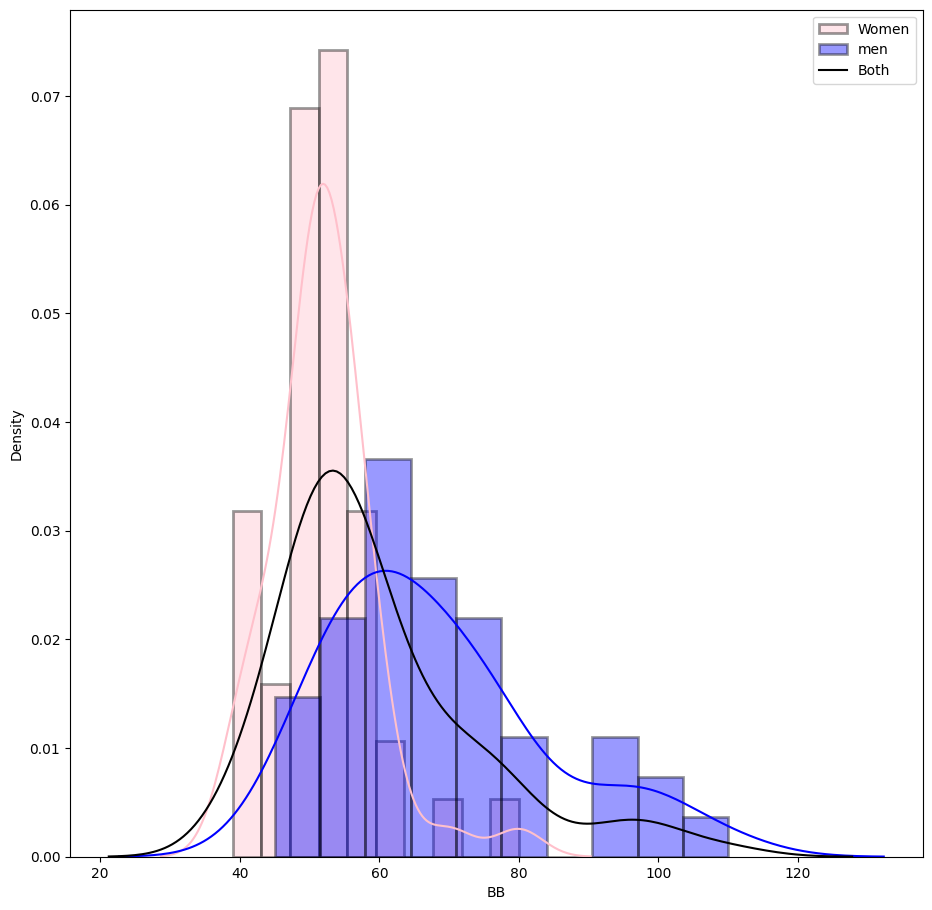

In [246]:
#check if it's normally distributed (histo+KDE)
plt.figure(figsize=(11,11))
c=["pink", "blue"]
for i in np.unique(df["Gender"].values):
    sns.distplot(df[df["Gender"]==i]["BB"], color=c[i],  label=str(gendernames[i]), bins=10, hist_kws=dict(edgecolor="black", linewidth=2))
sns.distplot(df["BB"], hist=False, bins=10, color="black", label="Both")
clear_output()
plt.legend(loc="upper right")

In [247]:
#statistical inference
class checknormalization():
    def __init__(self, data):
        self.data= data
        self.check()
        self.idk=pd.DataFrame({"p val": [self.kspval, self.shappval],
                               "status": [self.ksstatus, self.shapirostatus]}, ["Kolmogorov-Smirnov", "Shapiro-Wilk"])
    def check(self):
        self.kspval= kstest(self.data, "norm")[1]
        self.ksstatus= True if self.kspval >0.05 else False
        self.shappval= shapiro(self.data)[1]
        self.shapirostatus= True if self.shappval >0.05 else False
        
beforenormalization=checknormalization(df["BB"].values)
beforenormalization.idk

,p val,status
Kolmogorov-Smirnov,0.000000e+00,False
Shapiro-Wilk,4.295170e-07,False


Normlization!

1

![Alt text](image-3.png)

In [314]:
#1st normalization
#normalize DF.BB
BB=df.BB.values.reshape(1,-1)

dfnorm=df.copy()
dfnorm["BB"]=normalize(BB).reshape(-1)

In [289]:
dfnorm.head()

,BB,Gender
0,0.086715,0
1,0.069372,0
2,0.112730,1
3,0.086715,0
4,0.102324,1


In [315]:
#check after normalization
firstnorm=checknormalization(dfnorm["BB"].values)
firstnorm.idk
#Failzed

,p val,status
Kolmogorov-Smirnov,2.635323e-23,False
Shapiro-Wilk,4.295170e-07,False


2

![Alt text](image.png)

In [287]:
#2nd normalization
#with minmaxscaler
BB=df["BB"].values.reshape(-1,1)

dfminmax=df.copy()
scaler=MinMaxScaler()
scaler.fit(BB)
dfminmax["BB"]=scaler.transform(BB)

In [290]:
dfminmax.head()

,BB,Gender
0,0.154930,0
1,0.014085,0
2,0.366197,1
3,0.154930,0
4,0.281690,1


In [316]:
secondnorm=checknormalization(dfminmax["BB"].values)
secondnorm.idk
#Failed

,p val,status
Kolmogorov-Smirnov,7.211386e-21,False
Shapiro-Wilk,4.295170e-07,False


3

![Alt text](image-1.png)

In [318]:
#3rd normalization
#with standardscaler
BB=df["BB"].values.reshape(-1,1)

dfStandardScaler=df.copy()
scaler=StandardScaler()
scaler.fit(BB)
dfStandardScaler["BB"]=scaler.transform(BB)

In [319]:
dfStandardScaler.head()

,BB,Gender
0,-0.676106,0
1,-1.369547,0
2,0.364057,1
3,-0.676106,0
4,-0.052008,1


In [320]:
thirdnorm=checknormalization(dfStandardScaler["BB"].values)
thirdnorm.idk
#Failed

,p val,status
Kolmogorov-Smirnov,1.592159e-02,False
Shapiro-Wilk,4.295129e-07,False


In [344]:
#comparing result
merged=pd.DataFrame([firstnorm.idk.iloc[:,0].values,secondnorm.idk.iloc[:,0].values,thirdnorm.idk.iloc[:,0].values], columns=["P val Ks test", "P val shap test"], index=["normalization()", "minmaxscaler()", "standardscaler()"])
#show ks test only
print(merged["P val Ks test"])

normalization()     2.635323e-23
minmaxscaler()      7.211386e-21
standardscaler()    1.592159e-02
Name: P val Ks test, dtype: float64
